## Anomaly Detection

In [1]:
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections
from matplotlib import style
import matplotlib.font_manager
style.use('fivethirtyeight')
%matplotlib inline

In [2]:
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

def anomalies(y, window_size, sigma=1.0):
    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    std = np.std(residual)
    return {'standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

def plot_results(x, y, window_size, sigma_value=1,
                 xlabel='X Axis', ylabel='Y Axis',xlim=1000):
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, 'k.')
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    events = {}
    events = anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float, count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, 'r*', markersize=12)

    plt.grid(True)
    plt.show()

## Examples

## Standard Deviation Approach

In [3]:
df = pd.read_csv('C:/Users/HARENB/Desktop/sunspots.csv', sep='\t')
df.tail(3)

,Month,SunSpots
3140,3140,25.2
3141,3141,23.5
3142,3142,21.6


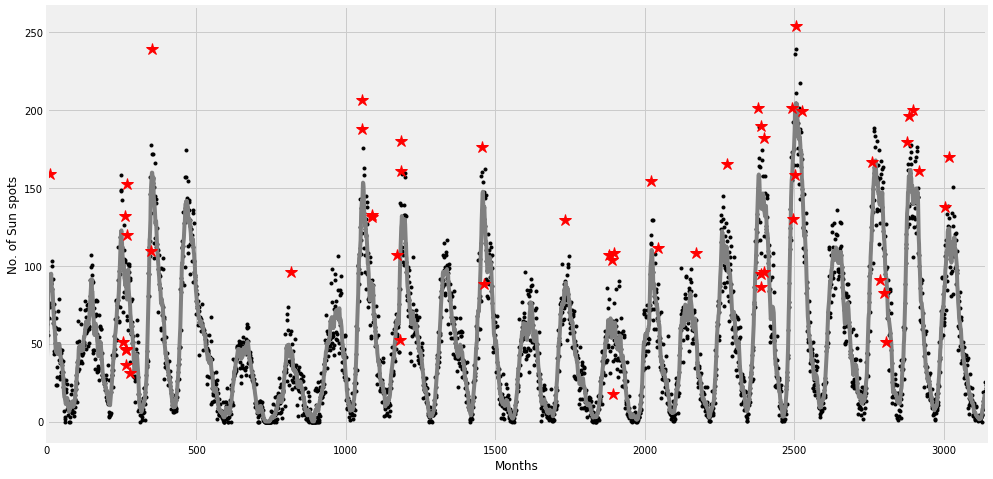

Info:{'standard_deviation': 11.424, 'anomalies_dict': OrderedDict([(10, 158.6), (253, 142.5), (255, 51.0), (262, 132.2), (264, 36.0), (268, 152.7), (278, 31.1), (349, 109.3), (352, 238.9), (361, 165.7), (818, 96.2), (986, 93.4), (1055, 206.3), (1069, 84.8), (1172, 107.1), (1182, 52.2), (1185, 180.4), (1464, 88.3), (1735, 129.2), (1882, 107.2), (1890, 103.6), (1897, 108.2), (2023, 154.5), (2025, 72.2), (2027, 129.3), (2171, 108.0), (2274, 165.3), (2380, 201.3), (2390, 94.8), (2391, 189.7), (2503, 158.0), (2518, 152.3), (2520, 217.4), (2521, 143.1), (2527, 199.6), (2755, 58.1), (2756, 138.2), (2789, 90.9), (2807, 127.0), (2885, 196.2), (2886, 126.9), (2897, 105.4), (2899, 200.3), (3005, 137.7), (3018, 170.1), (3032, 150.7)])}


In [4]:
x = df['Month']
y = df['SunSpots']

# plot
plot_results(x, y=y, window_size=10, xlabel='Months', sigma_value=3, ylabel='No. of Sun spots', xlim=len(y))
events = anomalies(y, window_size=5, sigma=3)

# display standard deviation and anomalous points
print(f'Info:{events}')

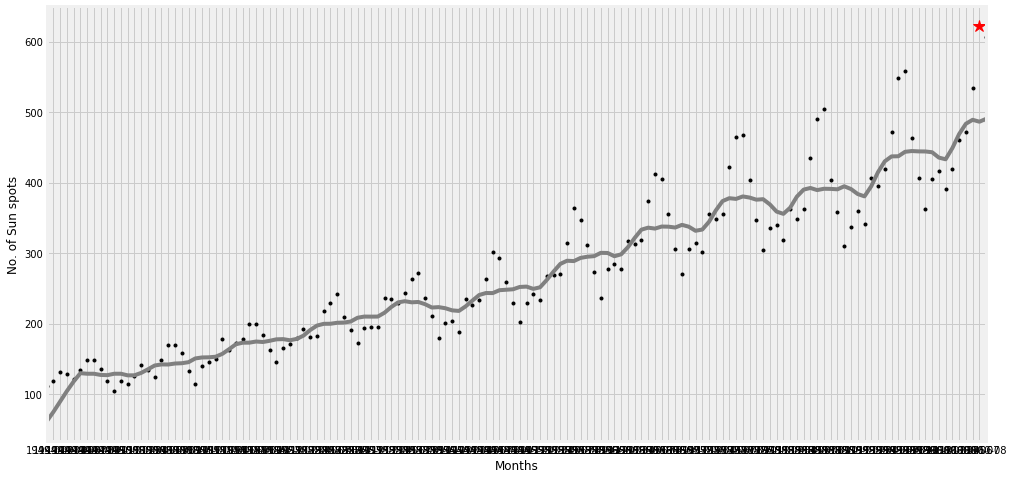

Info:{'standard_deviation': 26.75, 'anomalies_dict': OrderedDict([(143, 432)])}


In [5]:
df = pd.read_csv('C:/Users/HARENB/Desktop/IPYNB tests/AirPassengers.csv')

x = df['Month']
y = df['#Passengers']

plot_results(x, y=y, window_size=10, xlabel='Months', sigma_value=3, ylabel='No. of Sun spots', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

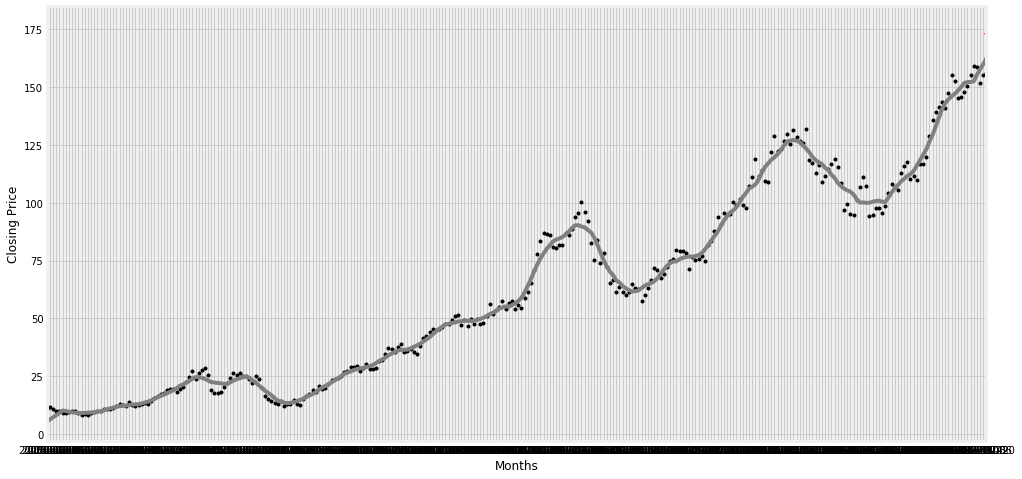

Info:{'standard_deviation': 5.112, 'anomalies_dict': OrderedDict([(300, 169.8), (301, 176.42)])}


In [6]:
df = pd.read_csv('C:/Users/HARENB/Desktop/CSV Files/AAPL_2006-01-01_to_2018-01-01.csv').iloc[::10,:]

x = df['Date']
y = df['Close']

plot_results(x, y=y, window_size=10, xlabel='Months', sigma_value=3, ylabel='Closing Price', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

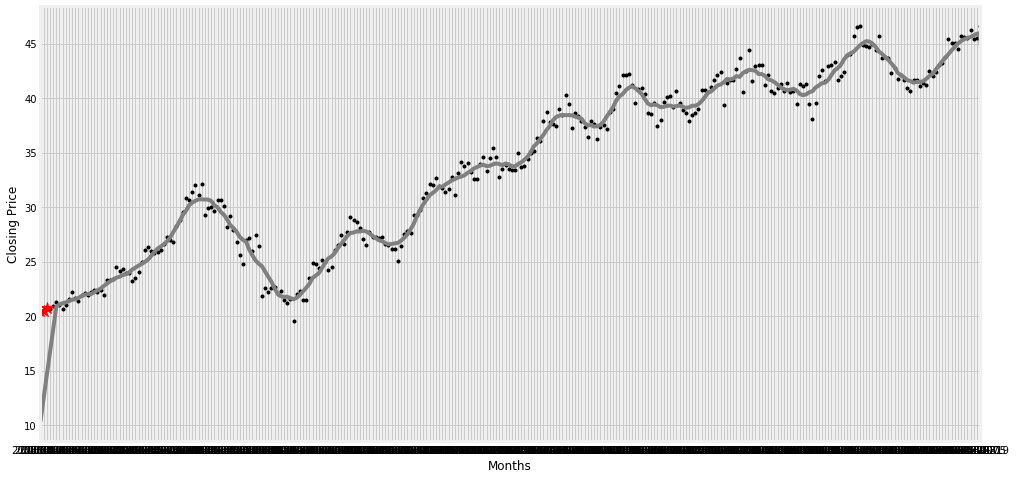

Info:{'standard_deviation': 1.439, 'anomalies_dict': OrderedDict([(0, 20.45), (300, 45.97), (301, 46.19)])}


In [7]:
df = pd.read_csv('C:/Users/HARENB/Desktop/CSV Files/KO_2006-01-01_to_2018-01-01.csv')
df = df.iloc[::10,:]
x = df['Date']
y = df['Close']

plot_results(x, y=y, window_size=10, xlabel='Months', sigma_value=3, ylabel='Closing Price', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

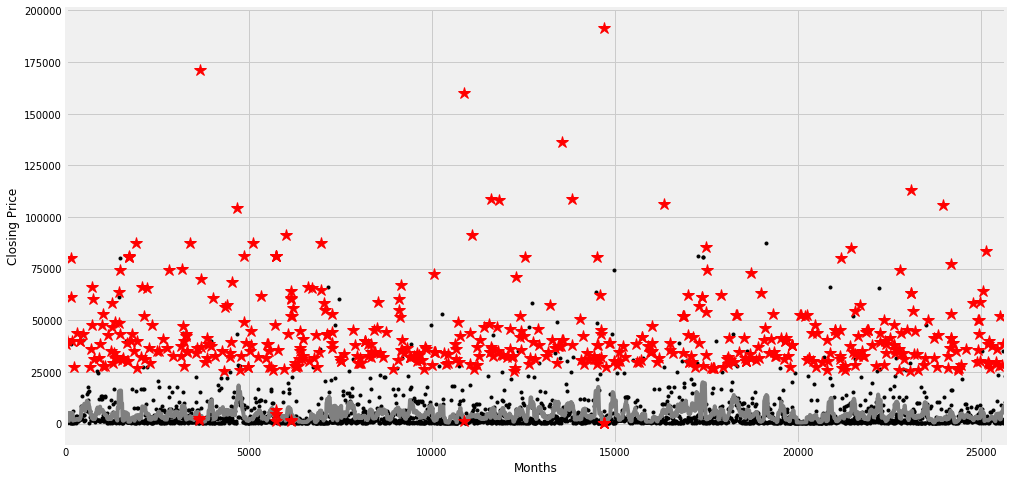

In [8]:
df = pd.read_csv('C:/Users/HARENB/Downloads/conn250K.csv')
df = df[df['1228']<200000].iloc[::10,:]

x = df['1']
y = df['1228']

plot_results(x, y=y, window_size=10, xlabel='Months', sigma_value=3, ylabel='Closing Price', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

# print(f'Info:{events}')

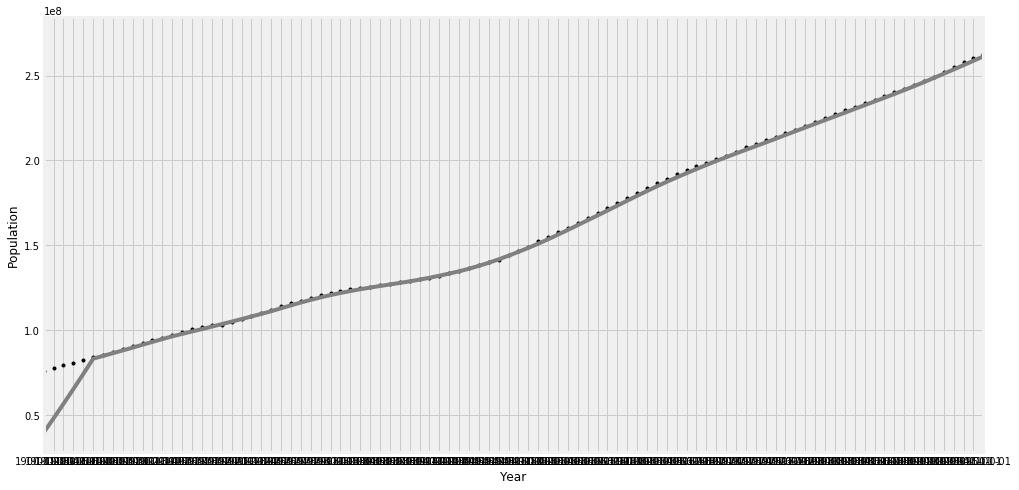

Info:{'standard_deviation': 12614096.657, 'anomalies_dict': OrderedDict([(98, 270248003), (99, 272690813)])}


In [9]:
df = pd.read_csv('national-population.csv')
x = df['date']
y = df['value']

plot_results(x, y=y, window_size=10, xlabel='Year', sigma_value=3, ylabel='Population', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

In [10]:
import os

In [11]:
os.chdir('C:/Users/HARENB/Downloads')

In [12]:
df = pd.read_csv('Folds5x2_pp_Sheet1.csv')

In [13]:
df = df.reset_index()

In [14]:
df.tail(3)

,index,AT,V,AP,RH,PE
9565,9565,31.32,74.33,1012.92,36.48,429.57
9566,9566,24.48,69.45,1013.86,62.39,435.74
9567,9567,21.60,62.52,1017.23,67.87,453.28


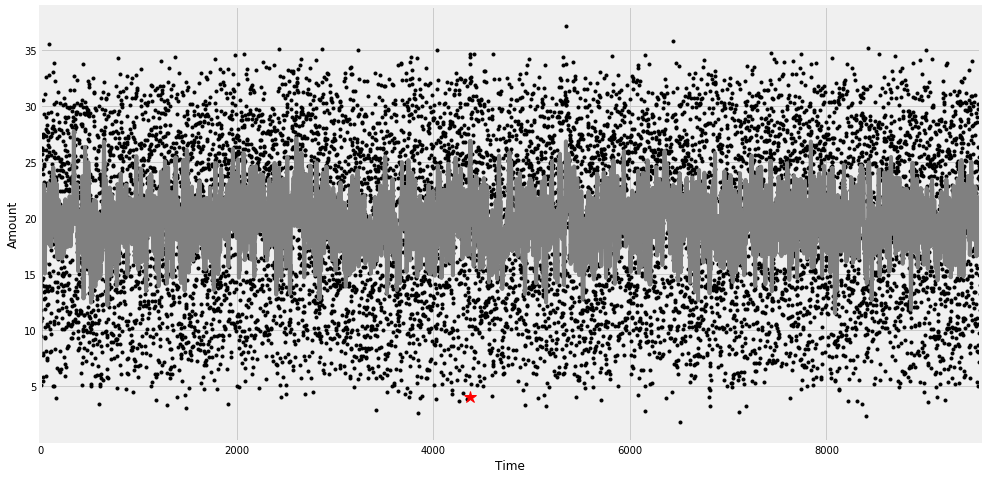

Info:{'standard_deviation': 6.668, 'anomalies_dict': OrderedDict([(4375, 3.96)])}


In [15]:
x = df['index']
y = df['AT']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

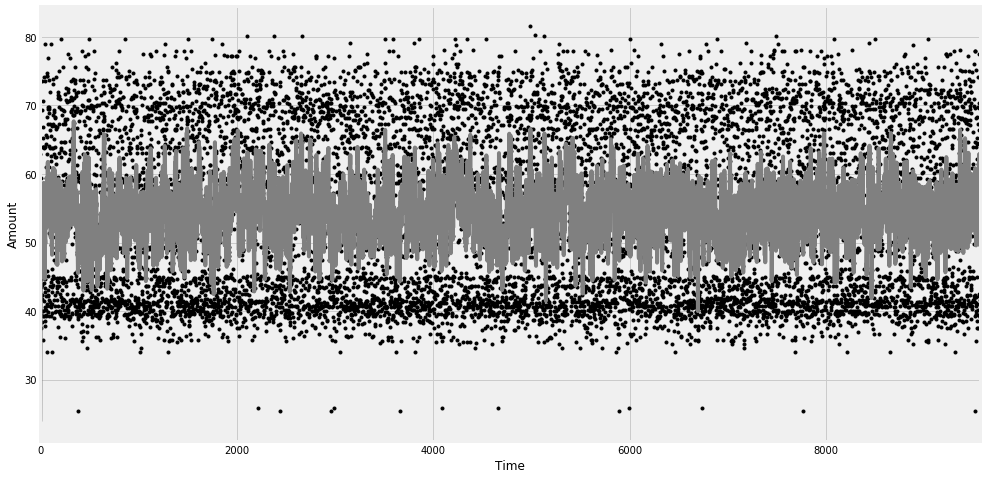

Info:{'standard_deviation': 11.368, 'anomalies_dict': OrderedDict()}


In [16]:
x = df['index']
y = df['V']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

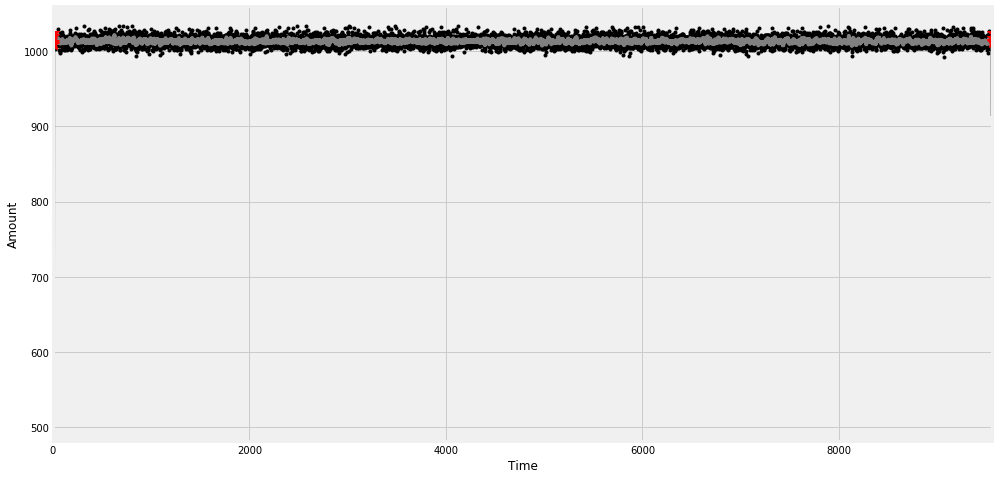

Info:{'standard_deviation': 8.491, 'anomalies_dict': OrderedDict([(0, 1024.07), (1, 1020.04), (9566, 1013.86), (9567, 1017.23)])}


In [17]:
df = pd.read_csv('Folds5x2_pp_Sheet1.csv').reset_index()
x = df['index']
y = df['AP']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

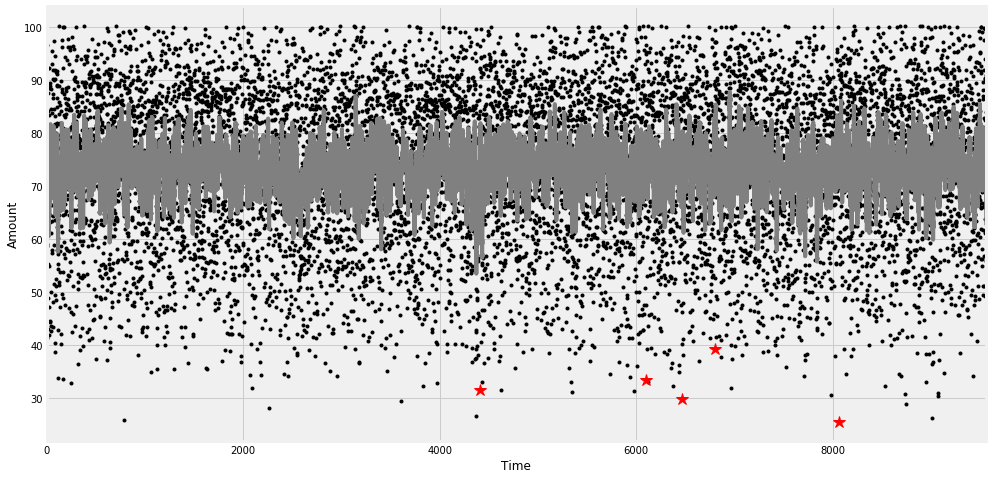

Info:{'standard_deviation': 13.142, 'anomalies_dict': OrderedDict([(1129, 99.22), (4367, 26.67), (4371, 99.68), (4410, 31.45), (6101, 33.41), (6120, 32.95), (6472, 29.86), (6968, 40.04), (7237, 98.77), (8061, 25.56), (8737, 30.83), (8751, 28.81), (9015, 26.3), (9018, 36.71), (9132, 34.64)])}


In [18]:
x = df['index']
y = df['RH']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

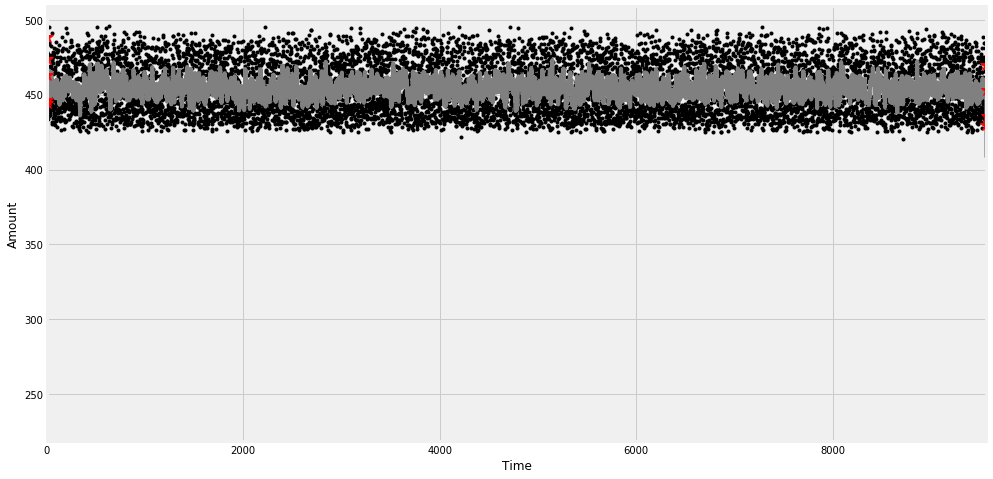

Info:{'standard_deviation': 15.522, 'anomalies_dict': OrderedDict([(0, 463.26), (1, 444.37), (9566, 435.74), (9567, 453.28)])}


In [19]:
x = df['index']
y = df['PE']

plot_results(x, y=y, window_size=10, xlabel='Time', sigma_value=3, ylabel='Amount', xlim=len(y)-5)
events = anomalies(y, window_size=5, sigma=3)

print(f'Info:{events}')

## ML Approach

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.font_manager
style.use('fivethirtyeight')
import pandas as pd
import numpy as np
from scipy import stats
from pyod.models.abod import ABOD
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

import warnings

In [8]:
df = pd.read_csv('C:/Users/HARENB/Downloads/Folds5x2_pp_Sheet1.csv').reset_index()
df.head()

,index,AT,V,AP,RH,PE
0,0,14.96,41.76,1024.07,73.17,463.26
1,1,25.18,62.96,1020.04,59.08,444.37
2,2,5.11,39.40,1012.16,92.14,488.56
3,3,20.86,57.32,1010.24,76.64,446.48
4,4,10.82,37.50,1009.23,96.62,473.90


In [3]:
#pick column name to experiment on
var_name = 'PE'

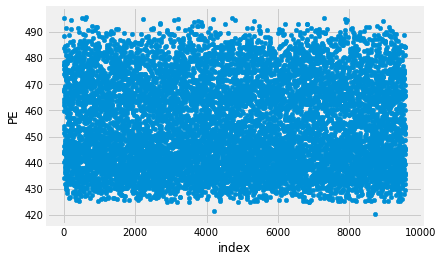

In [4]:
df.plot.scatter('index', var_name)

In [16]:
from sklearn.preprocessing import MinMaxScaler

#normalizing data
warnings.filterwarnings('ignore')

scaler = MinMaxScaler(feature_range=(0, 1))
df[['index',var_name]] = scaler.fit_transform(df[['index',var_name]])

warnings.filterwarnings('default')

df[['index',var_name]].head(3)

,index,PE
0,0.000000,0.569536
1,0.000105,0.319338
2,0.000209,0.904636


In [25]:
X1 = df['index'].values.reshape(-1,1)
X2 = df[var_name].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

In [26]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
classifiers = {
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction),
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state,behaviour='new')
}

OUTLIERS: 312 INLIERS: 9256
Using K Nearest Neighbors (KNN)


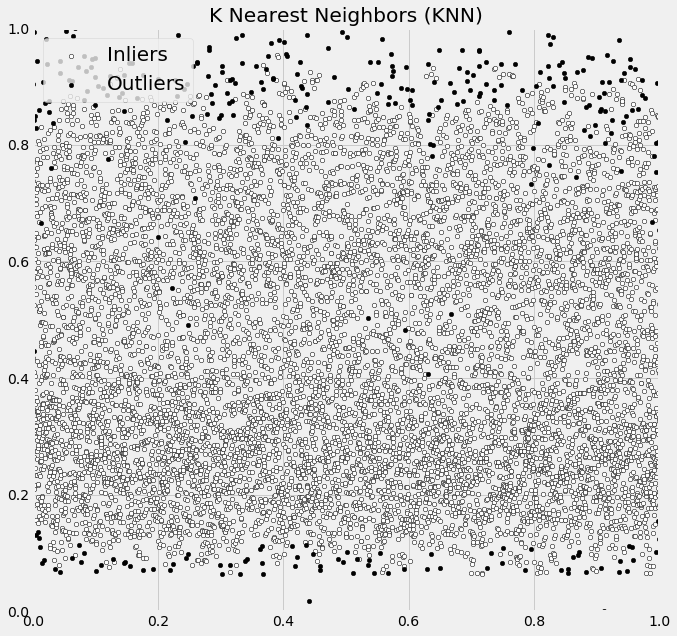

OUTLIERS: 134 INLIERS: 9434
Using Average KNN


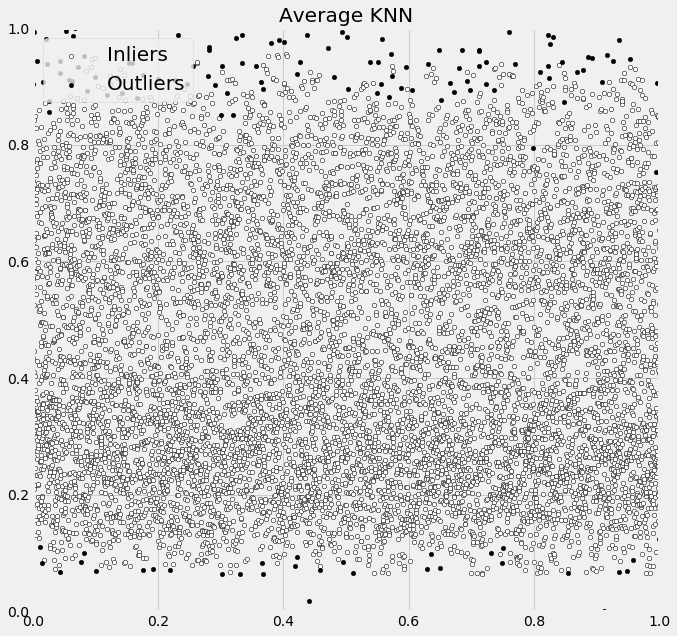

OUTLIERS: 511 INLIERS: 9057
Using Angle-based Outlier Detector (ABOD)


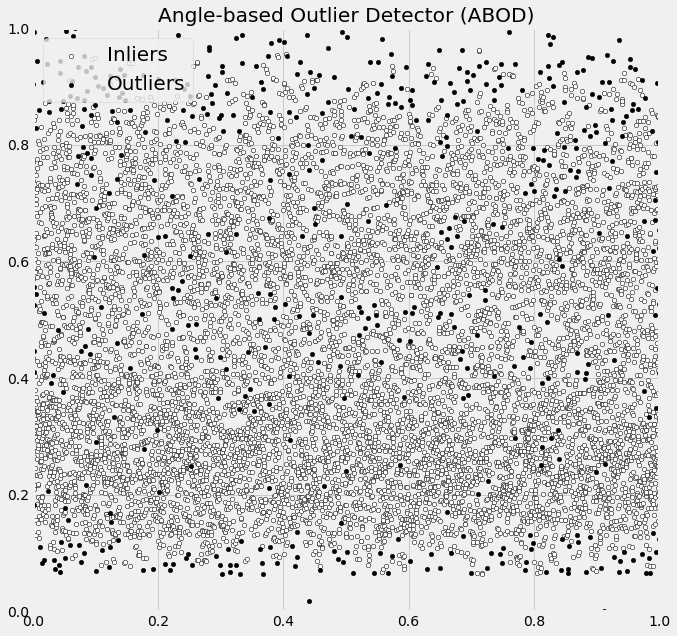

OUTLIERS: 411 INLIERS: 9157
Using Feature Bagging


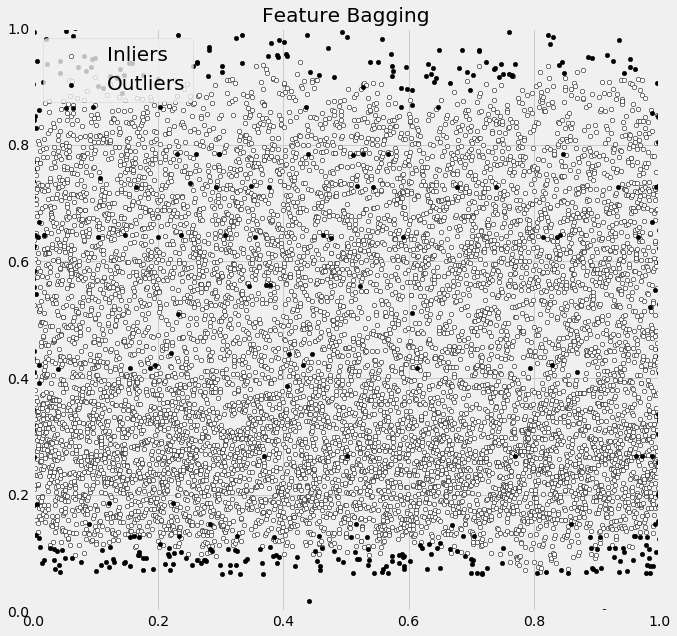

OUTLIERS: 425 INLIERS: 9143
Using Histogram-base Outlier Detection (HBOS)


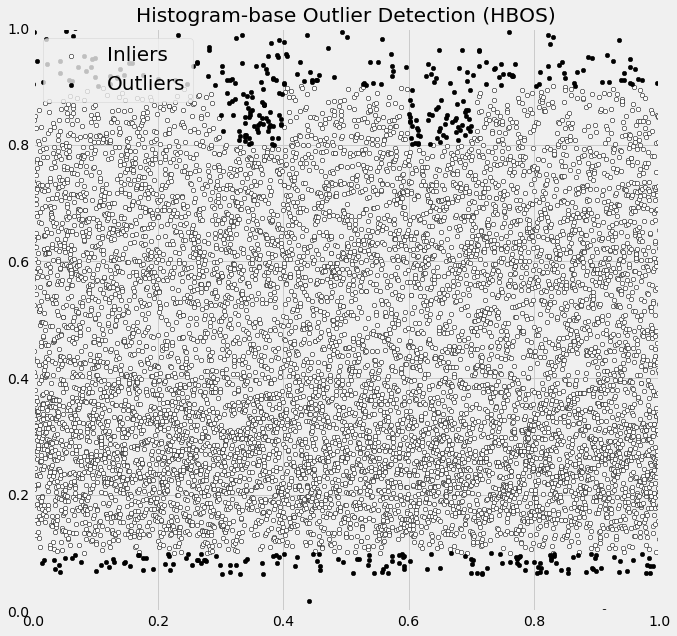

OUTLIERS: 479 INLIERS: 9089
Using Isolation Forest


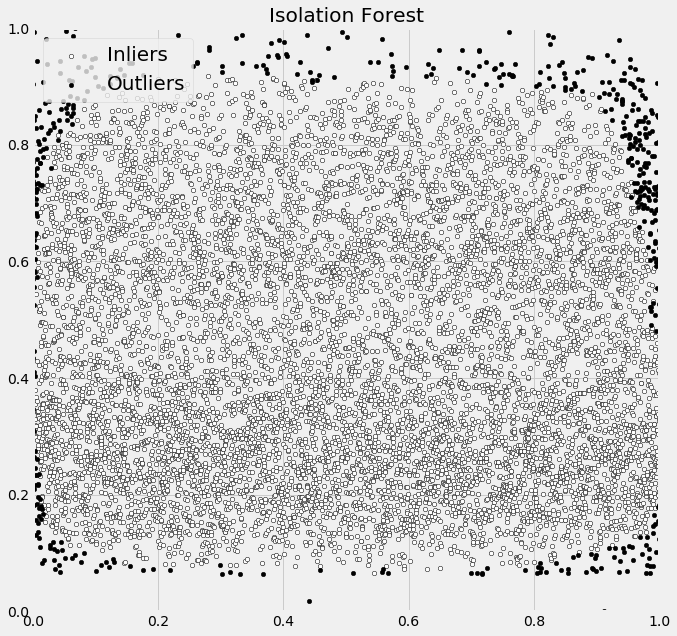

In [27]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    #predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    #prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    #new df w/ outliers
    dfx = df
    dfx['Outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['index'][dfx['Outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx[var_name][dfx['Outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['index'][dfx['Outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx[var_name][dfx['Outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS: '+str(n_outliers)+' INLIERS: '+str(n_inliers)+ '\nUsing '+str(clf_name))
        
    #threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    #decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [b,c],
        ['Inliers','Outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()